# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [121]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [122]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Define units of measurement
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    # city_url = url +"appid=" + weather_api_key + "&q="+ city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | sao felix do xingu
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | ciudad lazaro cardenas
Processing Record 6 of Set 1 | maragogi
Processing Record 7 of Set 1 | pisco
Processing Record 8 of Set 1 | flying fish cove
Processing Record 9 of Set 1 | namrup
Processing Record 10 of Set 1 | pudozh
Processing Record 11 of Set 1 | wailua homesteads
Processing Record 12 of Set 1 | cafayate
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | boende
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | mulayjah
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | tralee
Processing Record

In [123]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [124]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,10.29,87,78,3.88,AU,1712770971
1,ancud,-41.8697,-73.8203,14.23,52,0,2.89,CL,1712770975
2,sao felix do xingu,-6.6447,-51.9950,27.68,76,100,2.00,BR,1712770981
3,waitangi,-43.9535,-176.5597,15.46,94,67,3.58,NZ,1712770843
4,ciudad lazaro cardenas,17.9583,-102.2000,28.42,54,32,5.47,MX,1712771058


In [125]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [126]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,10.29,87,78,3.88,AU,1712770971
1,ancud,-41.8697,-73.8203,14.23,52,0,2.89,CL,1712770975
2,sao felix do xingu,-6.6447,-51.9950,27.68,76,100,2.00,BR,1712770981
3,waitangi,-43.9535,-176.5597,15.46,94,67,3.58,NZ,1712770843
4,ciudad lazaro cardenas,17.9583,-102.2000,28.42,54,32,5.47,MX,1712771058


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

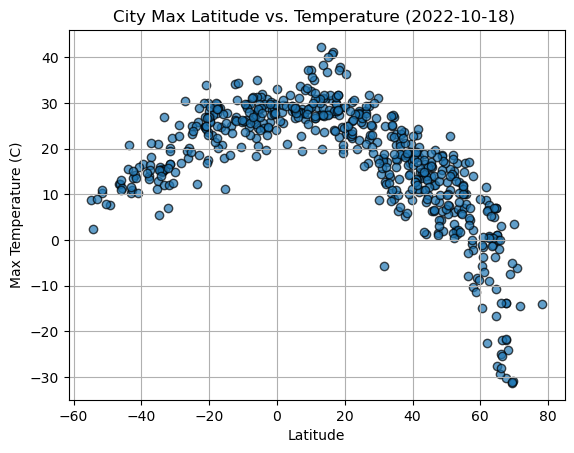

In [137]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.scatter(latitude, temperature, marker="o", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18) ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

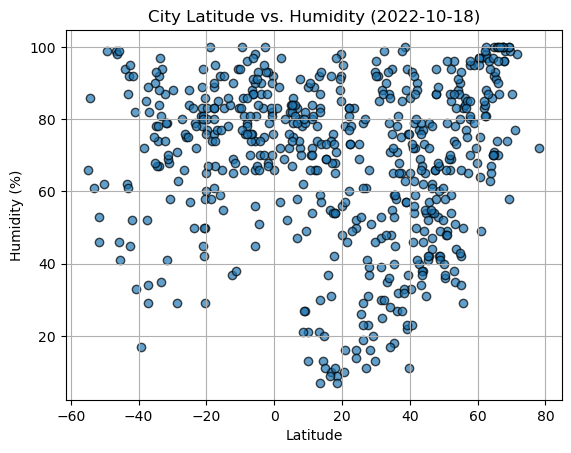

In [136]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.scatter(latitude, humidity, marker="o", edgecolors="black", alpha=0.7)
# plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

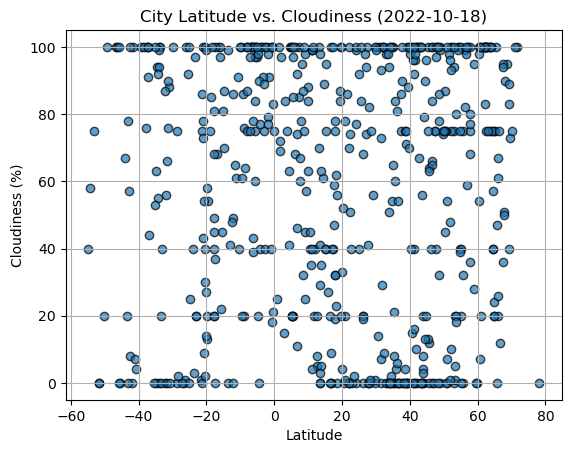

In [135]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness, marker="o", edgecolors="black", alpha=0.7)
# plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

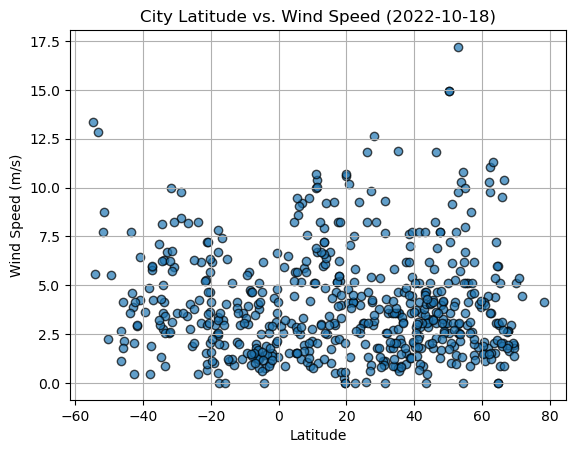

In [134]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(latitude, wind_speed, marker="o", edgecolors="black", alpha=0.7)
# plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [138]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, slop_coordinates, ylable):
    # Run regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot data
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Annotate linear regression
    plt.annotate(line_eq, slop_coordinates, fontsize=15, color="red")

    # Set plot labels and title
    plt.xlabel('Latitude')
    plt.ylabel(ylable)

    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()

In [139]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,ciudad lazaro cardenas,17.9583,-102.2000,28.42,54,32,5.47,MX,1712771058
8,namrup,27.1833,95.3333,22.20,61,94,0.94,IN,1712771059
9,pudozh,61.8099,36.5345,8.86,83,100,1.79,RU,1712771059
10,wailua homesteads,22.0669,-159.3780,22.44,83,0,4.12,US,1712771011
16,bethel,41.3712,-73.4140,19.19,54,40,5.14,US,1712770844


In [140]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,10.29,87,78,3.88,AU,1712770971
1,ancud,-41.8697,-73.8203,14.23,52,0,2.89,CL,1712770975
2,sao felix do xingu,-6.6447,-51.9950,27.68,76,100,2.00,BR,1712770981
3,waitangi,-43.9535,-176.5597,15.46,94,67,3.58,NZ,1712770843
5,maragogi,-9.0122,-35.2225,29.55,66,76,3.92,BR,1712771058


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.712822236873178


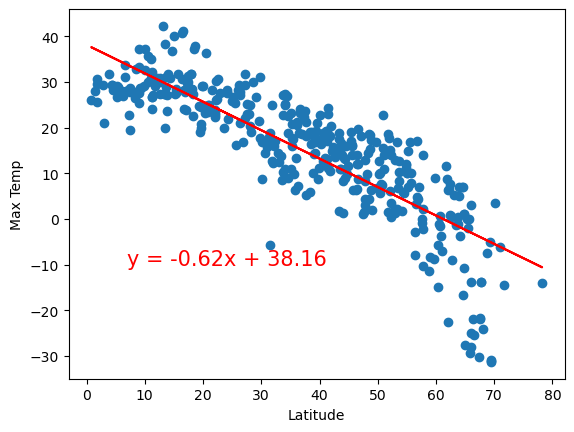

In [141]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, (7, -10), "Max Temp")

The r-squared is: 0.6427426868904603


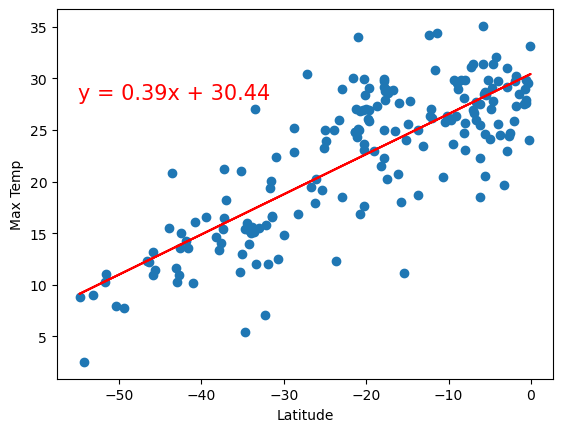

In [142]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, (-55, 28), "Max Temp")

**Discussion about the linear relationship:** <br>

Temperature vs. Latitude

Northern Hemisphere:
- The linear regression equation for maximum temperature and latitude in the Northern Hemisphere is y=−0.62x+38.16. This indicates that for every degree increase in latitude, there is a decrease of approximately 0.62°C in maximum temperature. The intercept of 38.16 suggests that at the equator (where latitude is 0), the predicted maximum temperature is approximately 38.16°C. The r-squared value of approximately 0.713 indicates that latitude explains about 71.3% of the variability in maximum temperature in the Northern Hemisphere.

Southern Hemisphere:
- The linear regression equation for maximum temperature and latitude in the Southern Hemisphere is y=0.39x+30.44. This suggests that for every degree increase in latitude, there is an increase of approximately 0.39°C in maximum temperature. The intercept of 30.44 indicates that at the equator (where latitude is 0), the predicted maximum temperature is approximately 30.44°C. The r-squared value of approximately 0.643 indicates that latitude explains about 64.3% of the variability in maximum temperature in the Southern Hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.053835958590759854


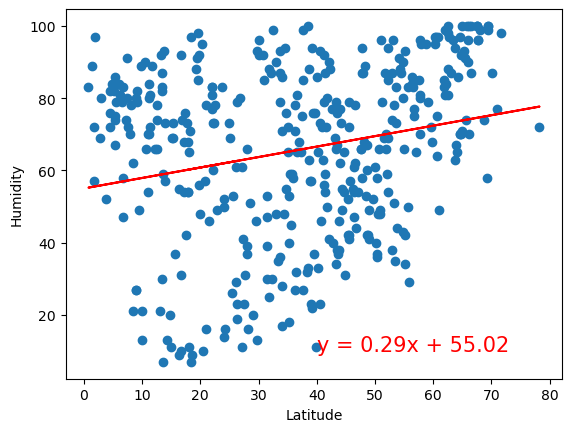

In [143]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, (40, 10),"Humidity")

The r-squared is: 0.04190743930125519


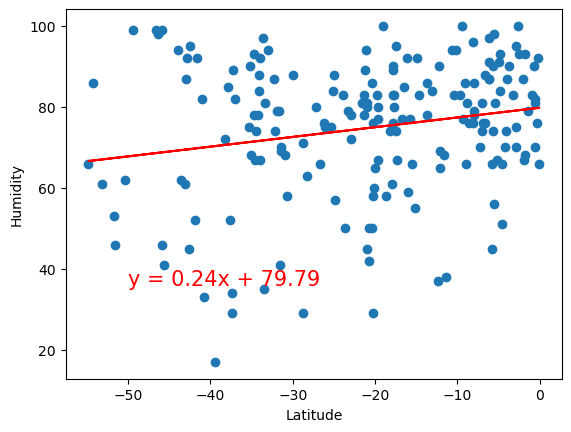

In [144]:
# Southern Hemispheree
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, (-50, 36),"Humidity")

**Discussion about the linear relationship:** <br>

Humidity vs. Latitude

Northern Hemisphere:
- The linear regression equation for humidity and latitude in the Northern Hemisphere is y=0.29x+55.02. This indicates that for every degree increase in latitude, there is an increase of approximately 0.29% in humidity. The intercept of 55.02 suggests that at the equator (where latitude is 0), the predicted humidity is approximately 55.02%. The r-squared value of approximately 0.054 indicates that latitude explains about 5.4% of the variability in humidity in the Northern Hemisphere.

Southern Hemisphere:
- The linear regression equation for humidity and latitude in the Southern Hemisphere is y=0.24x+79.79. This suggests that for every degree increase in latitude, there is an increase of approximately 0.24% in humidity. The intercept of 79.79 indicates that at the equator (where latitude is 0), the predicted humidity is approximately 79.79%. The r-squared value of approximately 0.042 indicates that latitude explains about 4.2% of the variability in humidity in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.007907720145853447


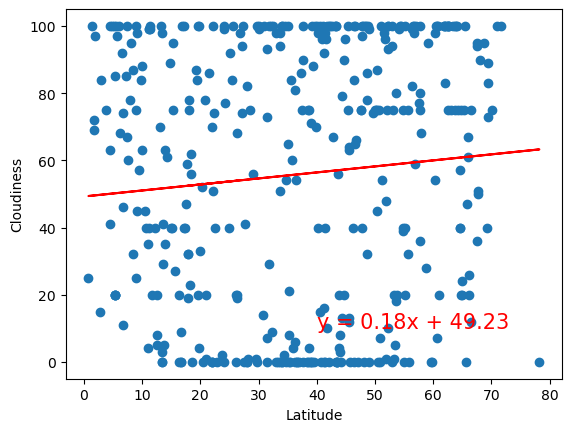

In [149]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, (40, 10),"Cloudiness")

The r-squared is: 0.06154581987543942


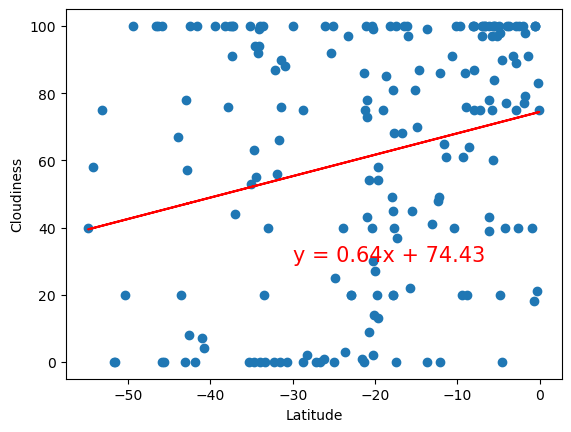

In [148]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, (-30, 30),"Cloudiness")

**Discussion about the linear relationship:** <br>

Cloudiness vs. Latitude

Northern Hemisphere:
- The linear regression equation for cloudiness and latitude in the Northern Hemisphere is y=0.18x+49.23. This indicates that for every degree increase in latitude, there is an increase of approximately 0.18% in cloudiness. The intercept of 49.23 suggests that at the equator (where latitude is 0), the predicted cloudiness is approximately 49.23%. The low r-squared value of approximately 0.008 indicates that latitude has very little explanatory power in predicting cloudiness in the Northern Hemisphere.

Southern Hemisphere:
- The linear regression equation for cloudiness and latitude in the Southern Hemisphere is y=0.64x+74.43. This suggests that for every degree increase in latitude, there is an increase of approximately 0.64% in cloudiness. The intercept of 74.43 indicates that at the equator (where latitude is 0), the predicted cloudiness is approximately 74.43%. The r-squared value of approximately 0.062 indicates that latitude explains about 6.2% of the variability in cloudiness in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00556097934560403


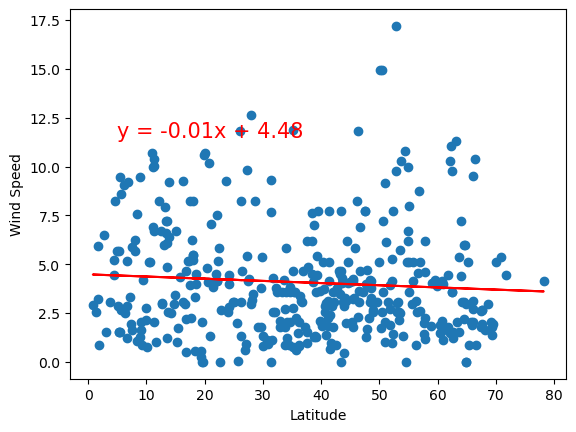

In [146]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, (5, 11.5),"Wind Speed")

The r-squared is: 0.1602533604859518


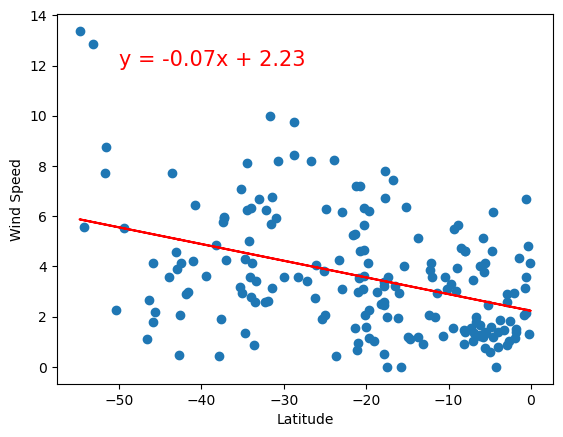

In [147]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, (-50, 12),"Wind Speed")

**Discussion about the linear relationship:** <br>

Wind Speed vs. Latitude

Northern Hemisphere:
- The linear regression equation for wind speed and latitude in the Northern Hemisphere is y=−0.01x+4.48. This indicates that for every degree increase in latitude, there is a negligible decrease of approximately 0.01 units in wind speed. The intercept of 4.48 suggests that at the equator (where latitude is 0), the predicted wind speed is approximately 4.48 units. The low r-squared value of approximately 0.006 indicates that latitude has very little explanatory power in predicting wind speed in the Northern Hemisphere.

Southern Hemisphere:
- The linear regression equation for wind speed and latitude in the Southern Hemisphere is y=−0.07x+2.23. This suggests that for every degree increase in latitude, there is a decrease of approximately 0.07 units in wind speed. The intercept of 2.23 indicates that at the equator (where latitude is 0), the predicted wind speed is approximately 2.23 units. The r-squared value of approximately 0.160 indicates that latitude explains about 16% of the variability in wind speed in the Southern Hemisphere.